In [1]:
%matplotlib inline
import numpy as np
from PIL import Image

# from keras.layers import merge, Input, Conv2D, MaxPooling2D, UpSampling2D, Cropping2D, Flatten, Dense, BatchNormalization, Dropout
# from keras.models import Model
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape, Merge, Permute
from keras.layers import ZeroPadding2D, UpSampling2D
from keras.layers.normalization import BatchNormalization

from keras.layers.merge import concatenate
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [3]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        cw = (target.get_shape()[2] - refer.get_shape()[2]).value
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1]).value
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)

In [4]:
def get_unet(ncha, img_rows, img_cols):

#     inputs = Input((img_rows, img_cols, ncha))
    label_rows = img_rows
    label_cols = img_cols
    ####################3
    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2

    model = Sequential()

    model.add(Layer(input_shape=(img_rows, img_cols, 3)))
    # encoding layers
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(filter_size, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(128, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(256, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(512, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # decoding layers
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(512, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(UpSampling2D(size=(pool_size, pool_size)))
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(256, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(UpSampling2D(size=(pool_size, pool_size)))
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(128, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(UpSampling2D(size=(pool_size, pool_size)))
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(filter_size, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(Convolution2D(1, 1, 1, border_mode='valid',))
    print model.output_shape
    model.add(Reshape((label_rows * label_cols,)))
    model.add(Activation('sigmoid'))

    model.add(Reshape((label_rows, label_cols, 1)))
    model.compile(loss="binary_crossentropy", optimizer='rmsprop',
                  metrics=['binary_accuracy'])
    ####################

#     model = Model(inputs = [inputs], outputs = [conv10])

#     model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [5]:
img_size = 256

In [6]:
model = get_unet(3, img_size, img_size)
# adam = Adam()
# model.compile(adam, loss=['binary_crossentropy'], metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="valid")`


(None, 256, 256, 1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 1), padding="valid")`


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Layer)              (None, 256, 256, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
__________

In [8]:
# imgs_train = [np.expand_dims(np.array(Image.open('/root/data/hackathon/building_massa_dataset/images/train/22678915_15.tiff')), axis=0)]
# imgs_mask_train = [np.expand_dims(np.array(Image.open('/root/data/hackathon/building_massa_dataset/labels/train/22678915_15.tif'))[6:-6, 6:-6], axis=0)]

In [9]:
batch_size = 8

In [10]:
train_steps = 1000//batch_size
val_steps = 100//batch_size

In [11]:
from generator import myGenerator

In [12]:
train = [os.path.join('/root/data/hackathon/building_massa_dataset/images/train/', f ) for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/train/') if f.endswith('.tiff')]
val = [os.path.join('/root/data/hackathon/building_massa_dataset/images/valid/', f ) for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/valid/') if f.endswith('.tiff')]
print len(train)
print len(val)
# train = [train[12]]
# val = [val[3]]
# print train
# print val
# tfile_list = [f for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/train/') if f.endswith('.tiff')]
# valfile_list = [f for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/valid/') if f.endswith('.tiff')]
# # just pick the first image
# train = [os.path.join('/root/data/hackathon/building_massa_dataset/images/train/', f ) for f in tfile_list[0]]
# val = [os.path.join('/root/data/hackathon/building_massa_dataset/images/valid/', f ) for f in valfile_list[0]]

137
4


In [13]:
train_generator = myGenerator(train, train_steps, batch_size, (img_size, img_size, 3))
validation_generator = myGenerator(val, val_steps, batch_size, (img_size, img_size, 3))

(8, 256, 256, 3)
(8, 256, 256, 1)


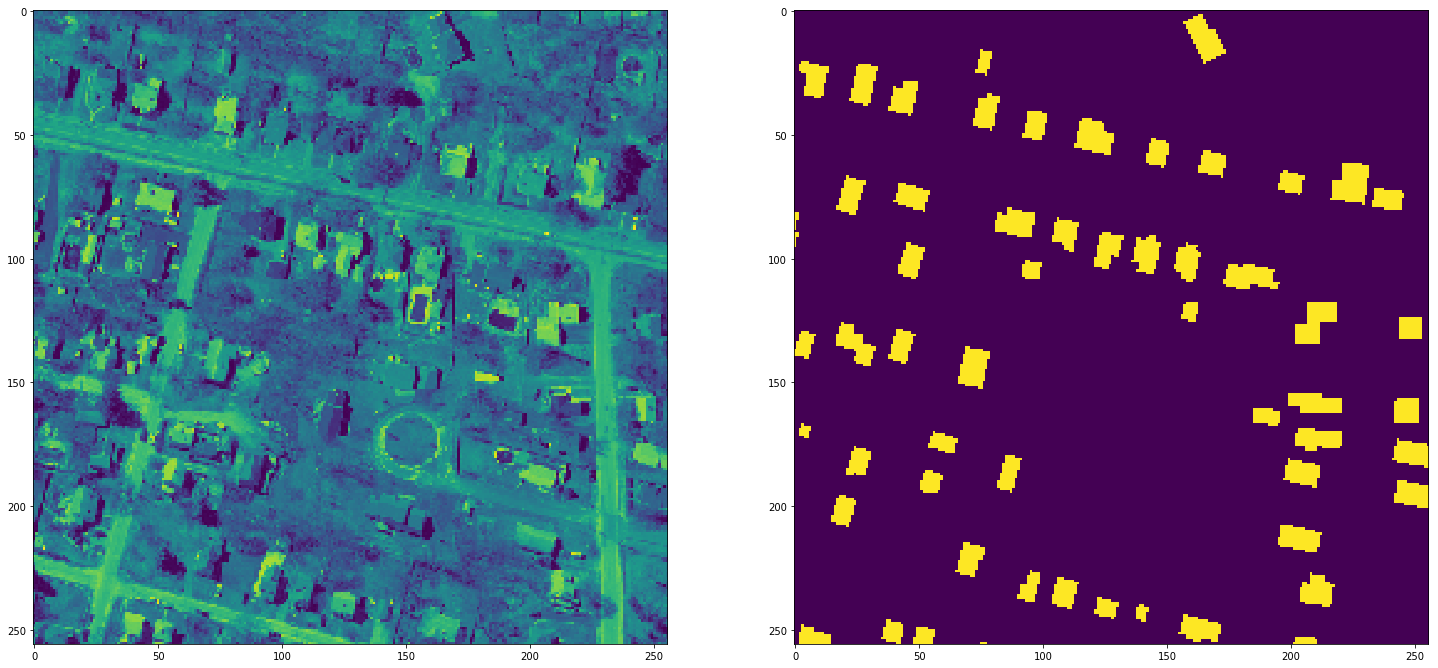

In [14]:
# plot train data
tt = train_generator.next()
buildings, label = tt[0], tt[1]
print buildings.shape
print label.shape
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,25))
ax1.imshow(buildings[0, :, :, 1])
ax2.imshow(label[0, :, :, 0])

In [20]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.5,
                             patience=1,
                             min_lr=1e-6)
checkpoint = ModelCheckpoint('/root/data/hackathon/restart_amir_weights_{epoch:02d}.hdf5')
callbacks_list = [reduce_lr, checkpoint]

In [21]:
from keras.optimizers import RMSprop


In [22]:
rmsprop = RMSprop(lr=1e-4)

In [23]:
model.compile(loss="binary_crossentropy", optimizer=rmsprop,
              metrics=['binary_accuracy'])

In [24]:
# start training
# history = model.fit_generator(
#         generator=train_generator,
#         steps_per_epoch=train_steps,
#         epochs=1,
#         verbose=1,
#         validation_data=validation_generator,
#         validation_steps=val_steps)

# start training
history = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=500,
        epochs=20,
        verbose=1,
        validation_data=validation_generator,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/20
500/500 [==============================] - 192s 385ms/step - loss: 0.1796 - binary_accuracy: 0.9287 - val_loss: 0.1319 - val_binary_accuracy: 0.9448
Epoch 2/20
500/500 [==============================] - 192s 383ms/step - loss: 0.1805 - binary_accuracy: 0.9284 - val_loss: 0.1507 - val_binary_accuracy: 0.9392
Epoch 3/20
500/500 [==============================] - 192s 384ms/step - loss: 0.1810 - binary_accuracy: 0.9279 - val_loss: 0.1563 - val_binary_accuracy: 0.9353
Epoch 4/20
500/500 [==============================] - 192s 384ms/step - loss: 0.1780 - binary_accuracy: 0.9293 - val_loss: 0.1227 - val_binary_accuracy: 0.9500
Epoch 5/20
500/500 [==============================] - 192s 384ms/step - loss: 0.1775 - binary_accuracy: 0.9295 - val_loss: 0.1422 - val_binary_accuracy: 0.9410
Epoch 6/20
500/500 [==============================] - 192s 384ms/step - loss: 0.1777 - binary_accuracy: 0.9296 - val_loss: 0.1583 - val_binary_accuracy: 0.9326
Epoch 7/20
348/500 [===================>

KeyboardInterrupt: 

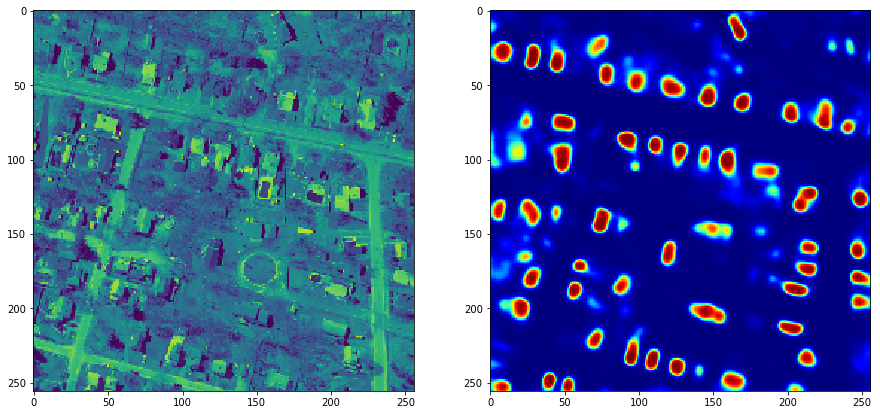

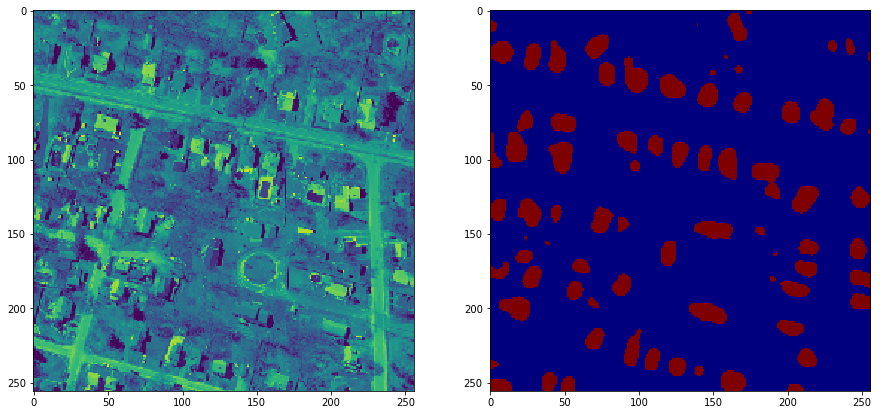

In [32]:
# test = model.predict(np.expand_dims(np.array(Image.open('/root/data/hackathon/building_massa_dataset/images/train/22678915_15.tiff'))[:img_size, :img_size, :], axis=0))
## model prediction on training data
test_inp = buildings
test_out = model.predict(test_inp)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(buildings[0, :, :, 1])
ax2.imshow(test_out[0, :, : , 0], cmap='jet')
tout = np.copy(test_out[0, :, : , 0])
tout[tout>0.2] = 1.0
tout[tout<=0.2] = 0.0
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(buildings[0, :, :, 1])
ax2.imshow(tout, cmap='jet')

In [38]:
tt = validation_generator.next()

(8, 256, 256, 3)
(8, 256, 256, 1)


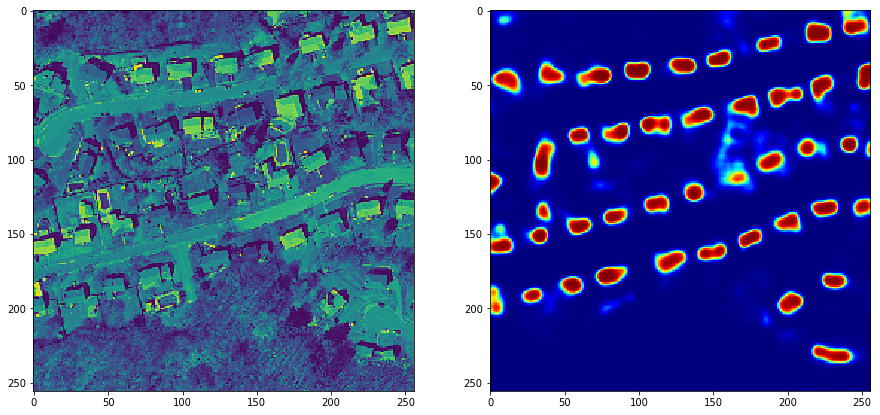

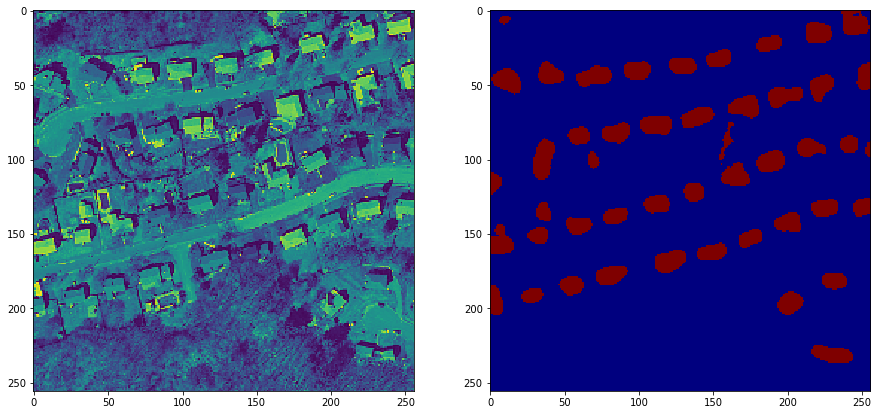

In [45]:
## prediction example on validation data

buildings_val, label_val = tt[0], tt[1]
print buildings_val.shape
print label_val.shape
test_inp = buildings_val
test_out = model.predict(test_inp)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
# ax1.imshow(buildings_val[0, :, :, 1])
ax1.imshow(buildings_val[0, :, :, 1])
ax2.imshow(test_out[0, :, :, 0], cmap='jet')
tout = np.copy(test_out[0, :, : , 0])
thresh = 0.25
tout[tout>0.25] = 1.0
tout[tout<=0.25] = 0.0
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(buildings_val[0, :, :, 1])
ax2.imshow(tout, cmap='jet')

In [ ]:
np.savez('counting_example.npz', test_out[0,:,:,:])

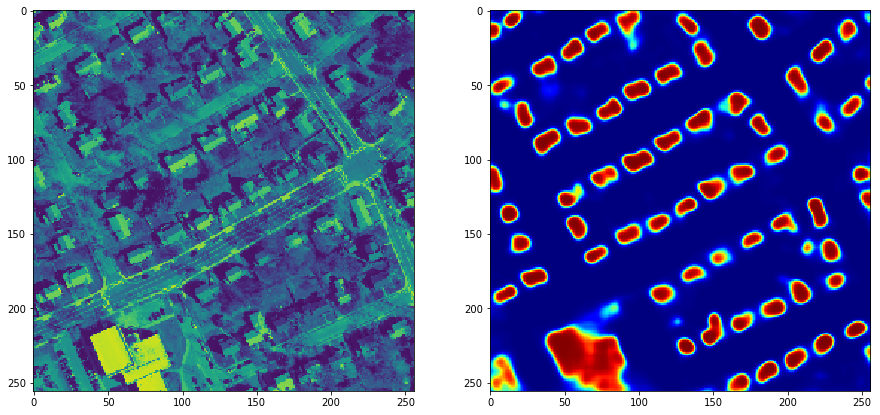

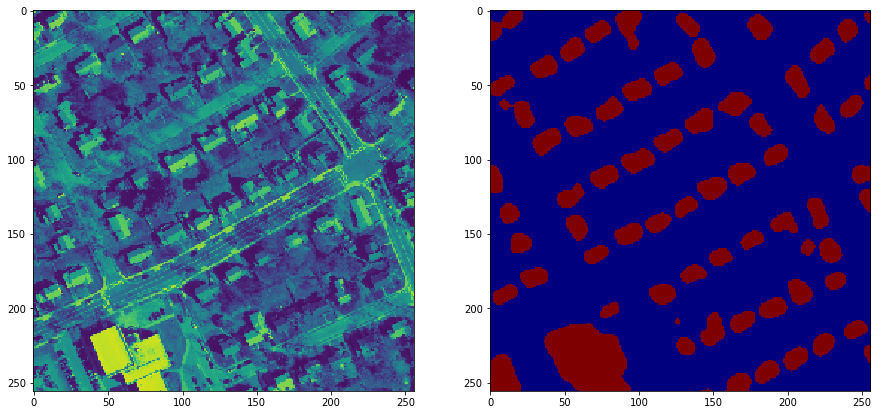

In [47]:
# test data
test_inp = np.expand_dims(np.array(Image.open('/root/data/hackathon/building_massa_dataset/images/test/22829050_15.tiff'))[:img_size, :img_size, :], axis=0)
test_out = model.predict(test_inp)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(test_inp[0, :, :, 1])
ax2.imshow(test_out[0, :, : , 0], cmap='jet')
tout = np.copy(test_out[0, :, : , 0])
tout[tout>0.2] = 1.0
tout[tout<=0.2] = 0.0
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(test_inp[0, :, :, 1])
ax2.imshow(tout, cmap='jet')